## Librerias

In [112]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import re

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy.stats as stats
from scipy.stats import mode
from scipy.stats import f_oneway
from scipy.stats import shapiro

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
 
# mis cosas
import sys
import os

## Data

In [19]:
data = pd.read_csv('data/train.csv')

In [20]:
df = data.copy()
# Convertir la columna 'ID' en el índice
df.set_index('ID', inplace=True)
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,,,,,,,,,,,,,,,,,,,,,
4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,0.27,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,0.10,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,0.00,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0


## 1. Definición del Problema

Sobre este dataframe planteado, anonimizado, se busca obtener el target

## 2. Recolección y Exploración de Datos

In [21]:
print(df.shape)
print(df.info())
df.head()

(5597, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 4995 to 3294
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5597 non-null   float64
 1   col2    5597 non-null   float64
 2   col3    5597 non-null   float64
 3   col4    5597 non-null   float64
 4   col5    5597 non-null   float64
 5   col6    5597 non-null   float64
 6   col7    5597 non-null   float64
 7   col8    5597 non-null   float64
 8   col9    5597 non-null   float64
 9   col10   5597 non-null   float64
 10  col11   5597 non-null   float64
 11  col12   5597 non-null   float64
 12  col13   5597 non-null   float64
 13  col14   5597 non-null   float64
 14  col15   5597 non-null   float64
 15  col16   5597 non-null   float64
 16  col17   5597 non-null   float64
 17  col18   5597 non-null   float64
 18  col19   5597 non-null   float64
 19  col20   5597 non-null   float64
 20  target  5597 non-null   int64  
dtypes: float64(20), int64(1)
mem

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,,,,,,,,,,,,,,,,,,,,,
4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


- Observo que no hay valores faltantes. 
- Observo que todos son valores numéricos, decimales (float), y que la target es entera, 0s y 1s. Voy a confirmar que no hay otros valores, y que es binario.

In [22]:
valores_unicos = df['target'].unique()
print(valores_unicos)

[0 1]


Confirmado lo anterior, estamos ante un problema de clasificación. 

In [23]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


para verlo mejor, procedo a graficar las variables independientemente.

### Análisis univariado

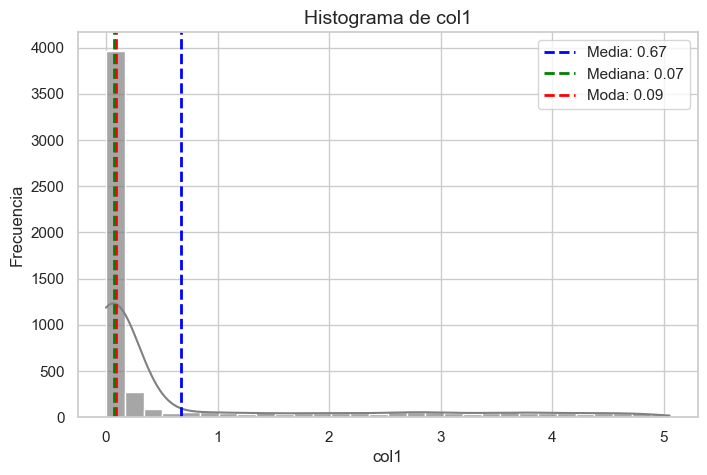

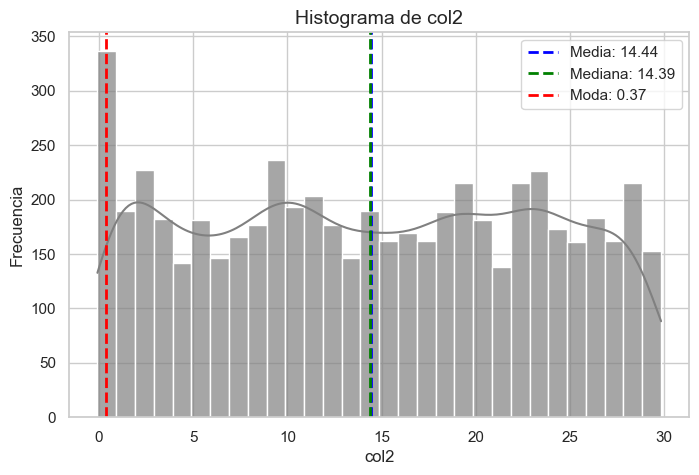

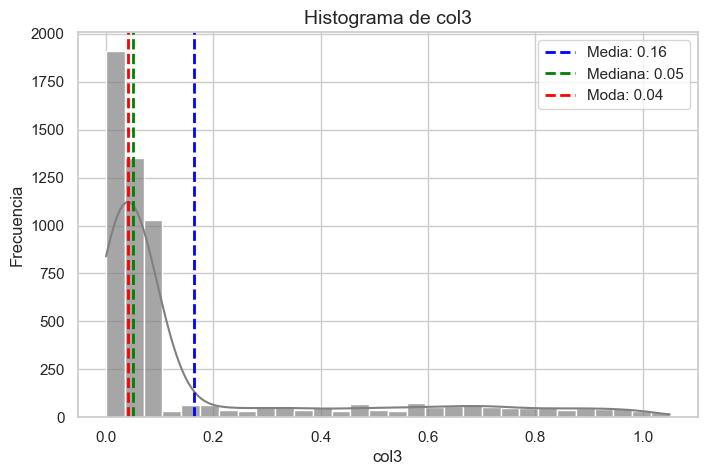

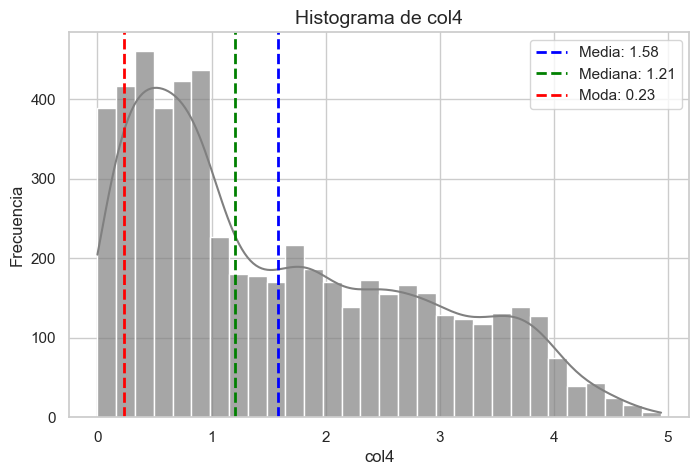

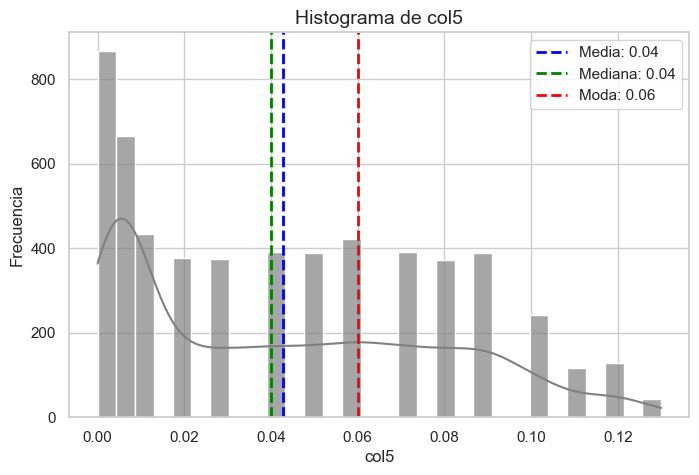

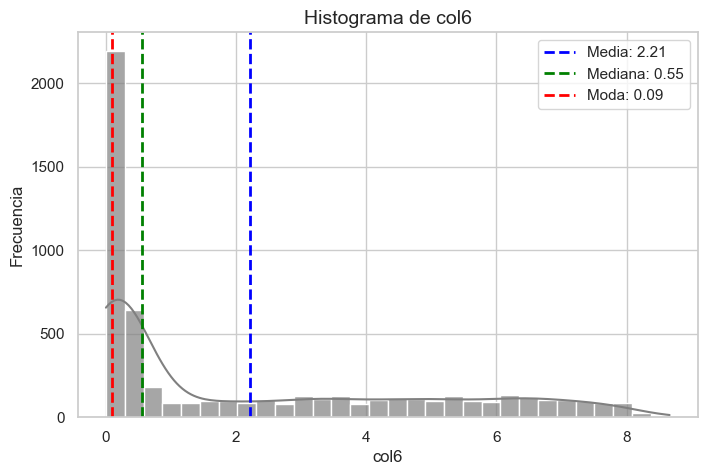

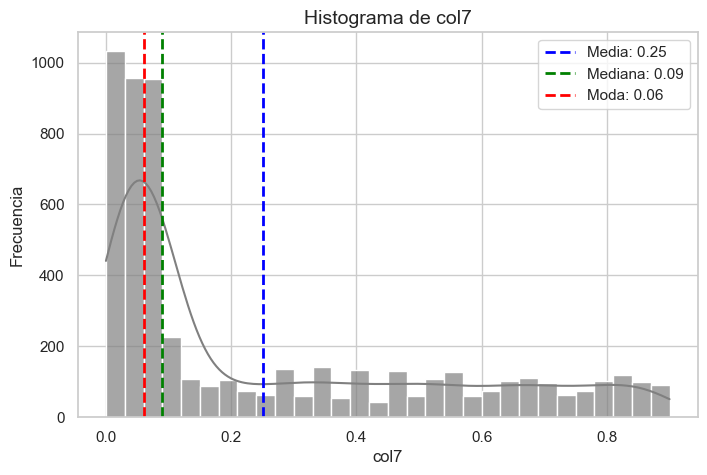

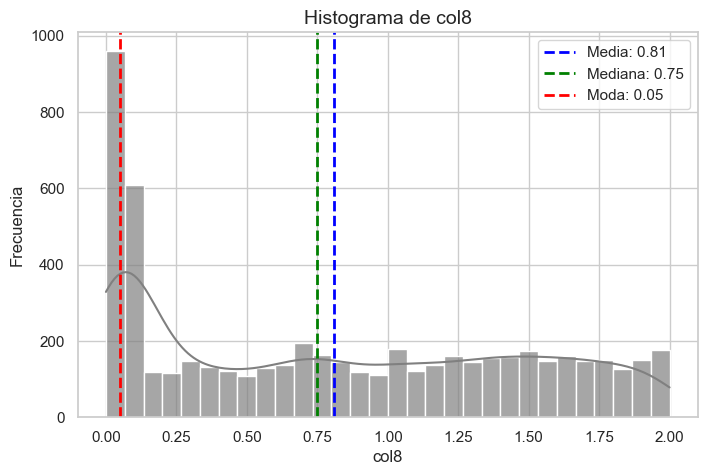

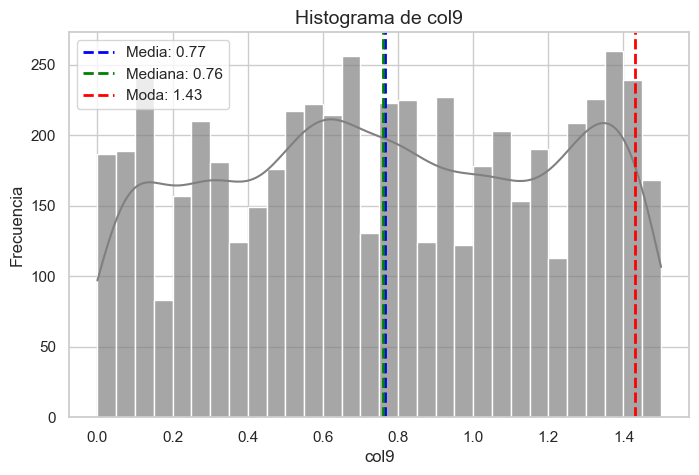

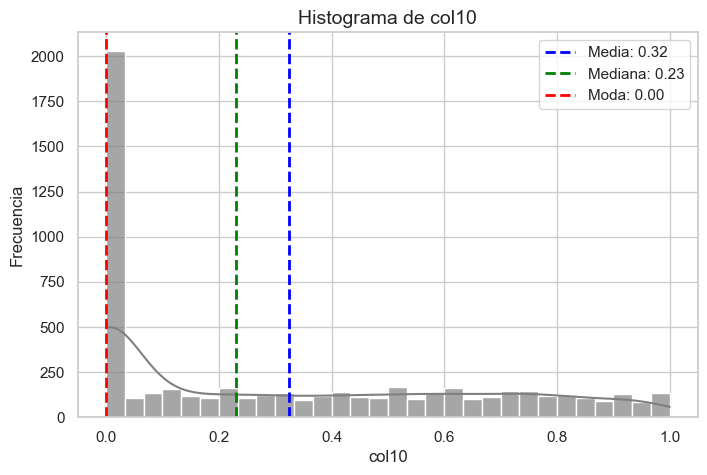

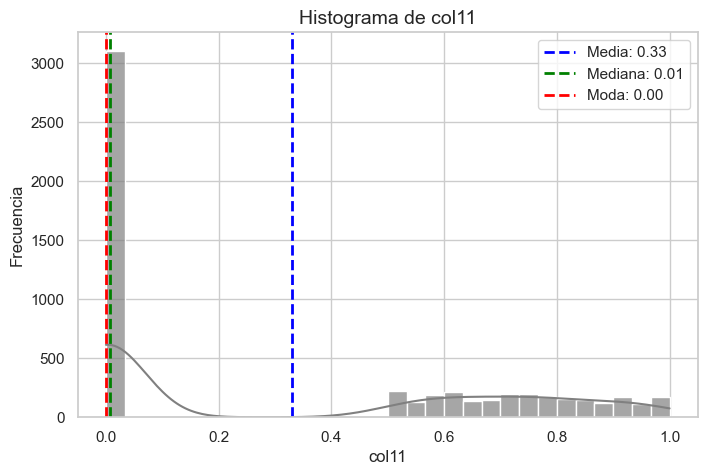

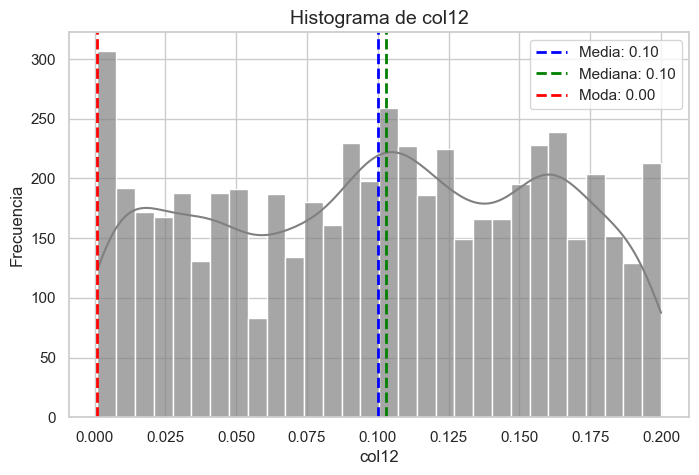

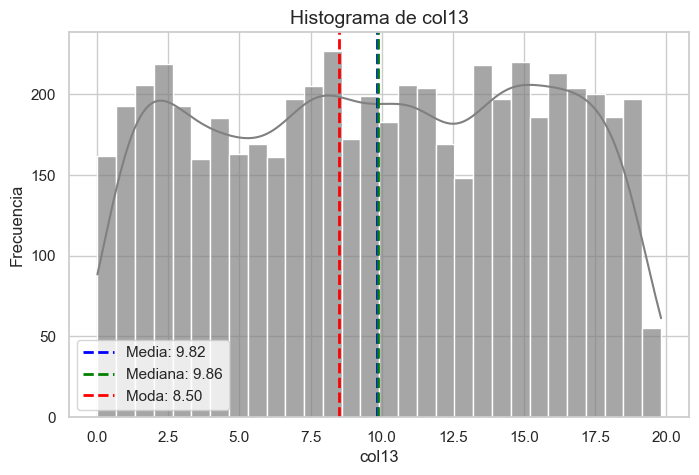

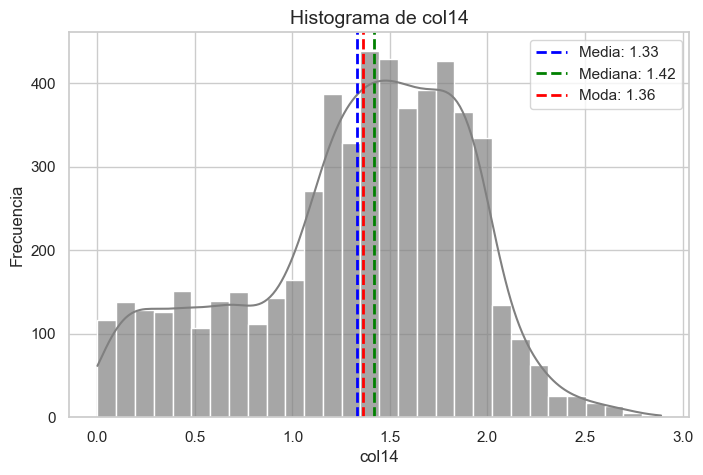

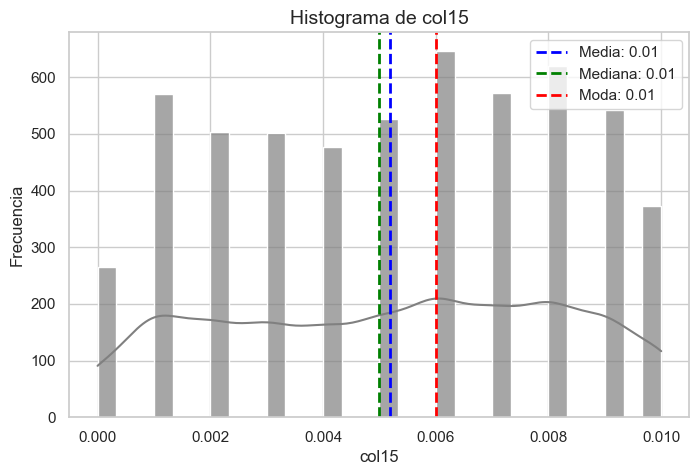

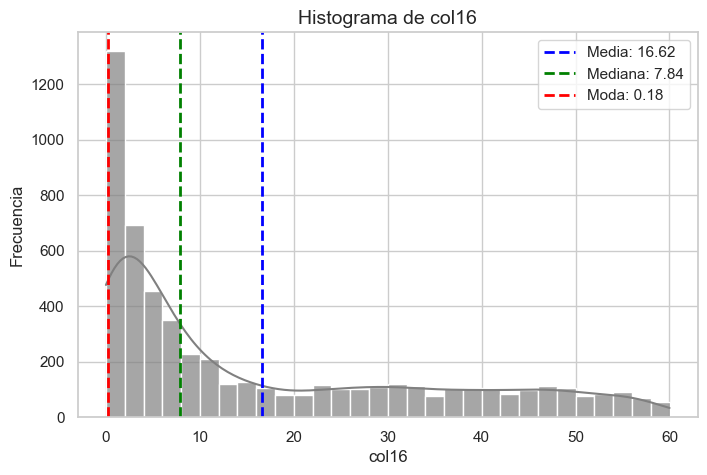

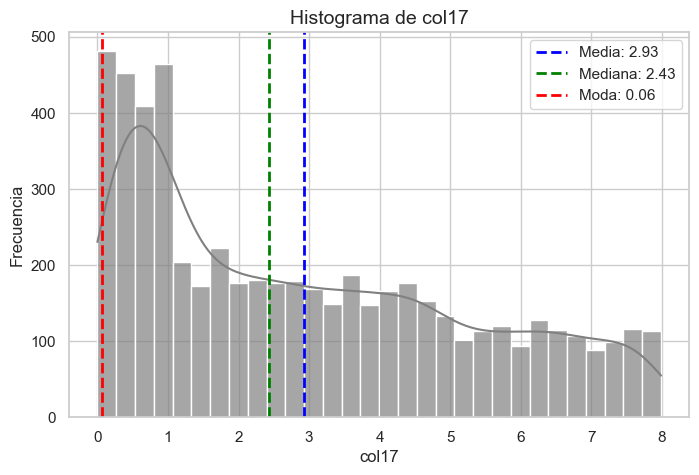

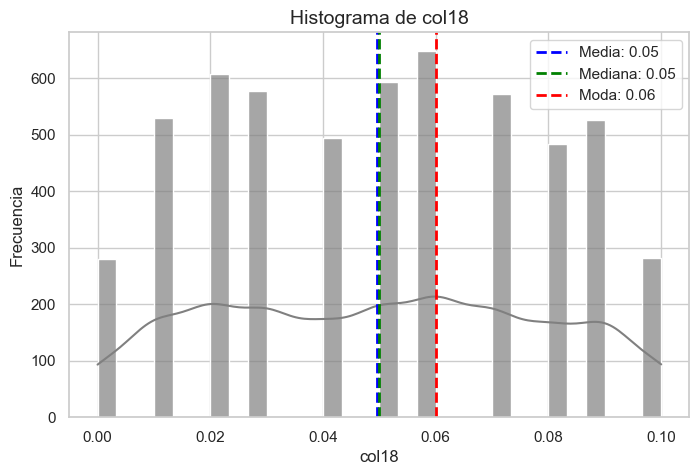

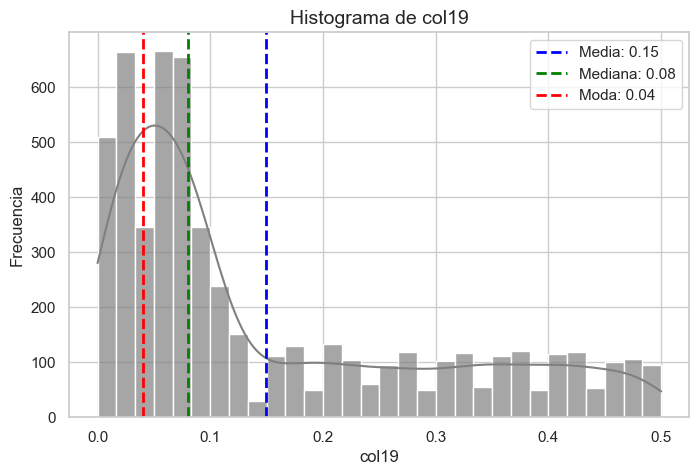

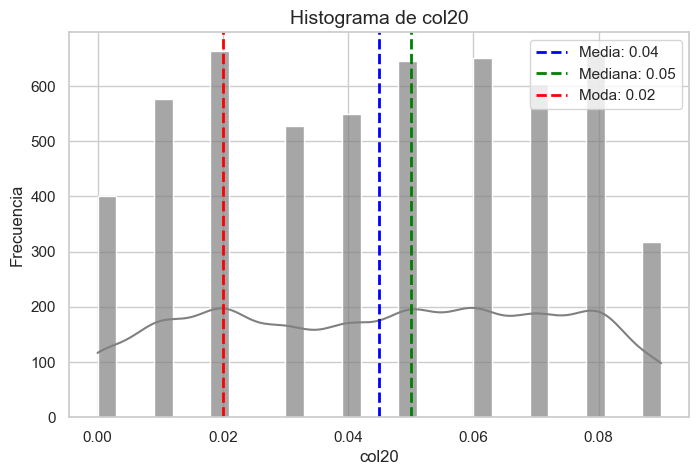

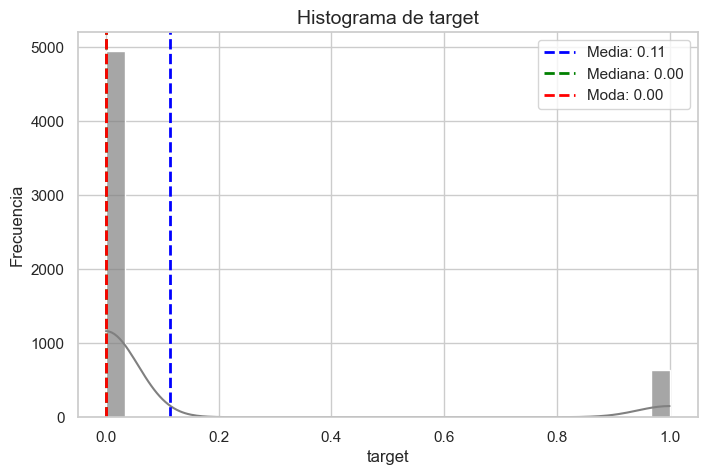

In [24]:
# Configuración de estilo
sns.set(style="whitegrid")

# Filtrar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop("ID", errors="ignore")  # Elimina 'ID' si existe


# Crear histogramas
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    
    # Histograma
    sns.histplot(df[col], bins=30, kde=True, color='gray', alpha=0.7)
    
    # Calcular estadísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    #mode_val = mode(df[col]).mode[0]  # scipy mode() retorna una tupla
    mode_result = mode(df[col].dropna(), keepdims=True)  # Evitar NaN y asegurar array
    mode_val = mode_result.mode[0] if mode_result.count[0] > 0 else np.nan  # Verificar si hay moda válida
    
    
    # Dibujar líneas
    plt.axvline(mean_val, color='blue', linestyle='dashed', linewidth=2, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_val:.2f}')
    plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {mode_val:.2f}')
    
    # Etiquetas y título
    plt.title(f'Histograma de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    
    # Mostrar gráfico
    plt.show()

De las columnas donde intuyo que hay outliers, realizo boxplot

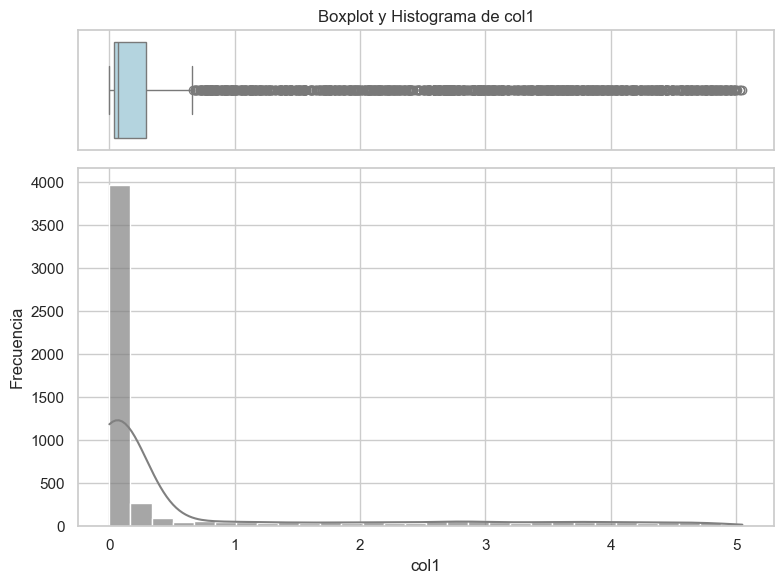

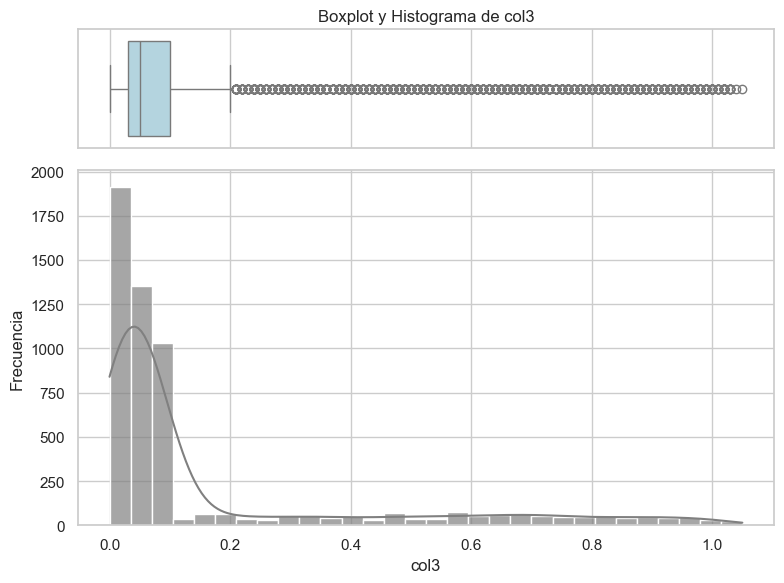

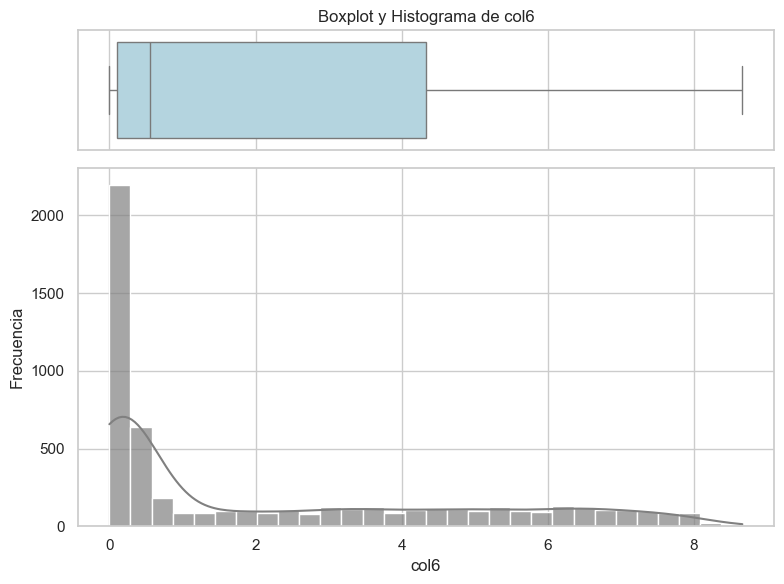

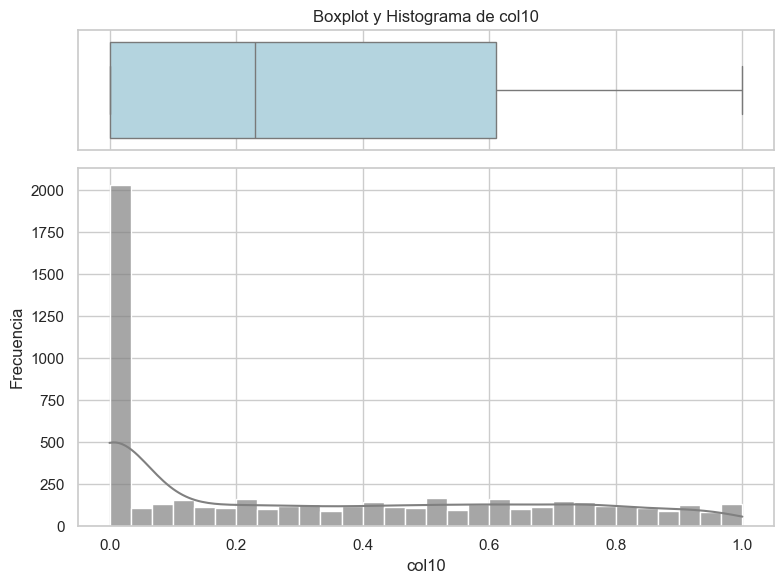

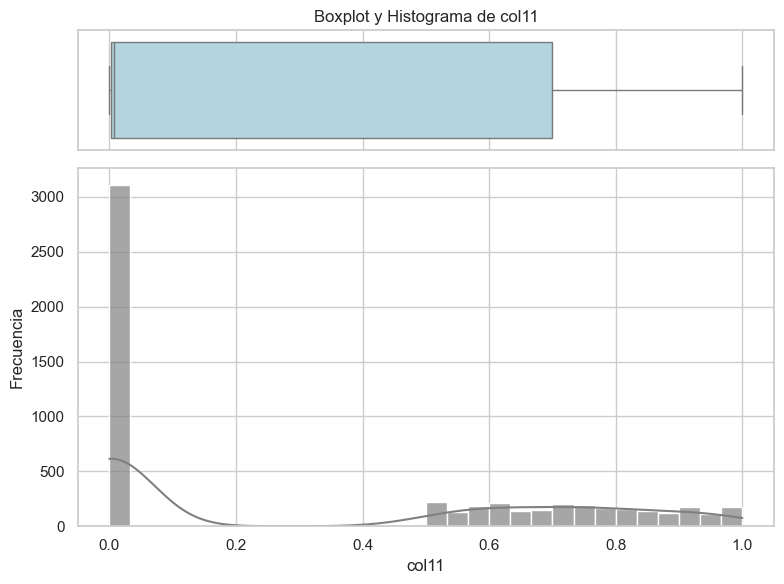

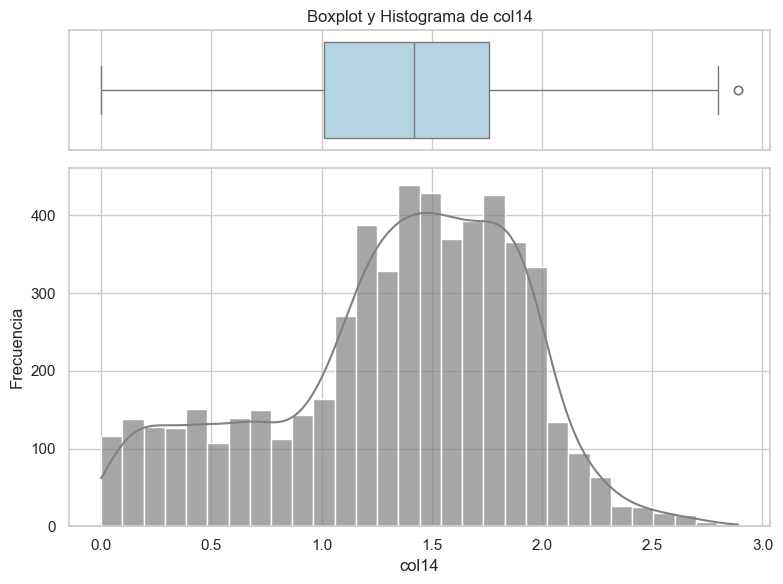

In [30]:
# Lista de columnas a graficar (columnas 1, 3 y 11 en índice 0-based)
columnas = ['col1', 'col3', 'col6', 'col10', 'col11', 'col14']  # Ajusta estos índices si es necesario


# Crear gráficos para cada columna
for col in columnas:
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

    # Boxplot arriba
    sns.boxplot(x=df[col], ax=ax[0], color="lightblue")
    ax[0].set(title=f"Boxplot y Histograma de {col}")
    ax[0].set(xlabel="")  # Ocultar etiqueta del eje X en el boxplot

    # Histograma abajo
    sns.histplot(df[col], bins=30, kde=True, color="gray", alpha=0.7, ax=ax[1])
    ax[1].set(xlabel=col, ylabel="Frecuencia")

    # Ajustar espacio entre gráficos
    plt.tight_layout()

    # Mostrar gráfico
    plt.show()

### Prueba de normalidad en la distribución de las variables
A simple vista, ninguna columna parece distribución normal, pero voy a validarlo con una prueba de normalidad 

In [89]:
#jrealizo test de normalidad Shapiro-Wilk en todas las columnas numéricas =todas
def test_normalidad_sh(df):
   
    results = []
    
    for column in df.select_dtypes(include=[np.number]).columns:
        statistic, p_value = stats.shapiro(df[column])
        results.append({
            'columna': column,
            'estadístico': statistic,
            'p_value': p_value,
            'es_normal': p_value > 0.05
        })
    
    return pd.DataFrame(results)

In [91]:
results = test_normalidad_sh(df)
print(results)

   columna  estadístico       p_value  es_normal
0     col1     0.570639  1.461251e-79      False
1     col2     0.949981  5.029929e-40      False
2     col3     0.623900  1.002848e-76      False
3     col4     0.917262  4.883790e-48      False
4     col5     0.906839  4.887686e-50      False
5     col6     0.797848  3.939683e-64      False
6     col7     0.798312  4.364803e-64      False
7     col8     0.901806  6.149664e-51      False
8     col9     0.954021  9.302632e-39      False
9    col10     0.853696  4.972573e-58      False
10   col11     0.748969  2.156670e-68      False
11   col12     0.956567  6.505356e-38      False
12   col13     0.953554  6.568674e-39      False
13   col14     0.962977  1.347394e-35      False
14   col15     0.946495  4.709935e-41      False
15   col16     0.829629  7.276984e-61      False
16   col17     0.915156  1.855998e-48      False
17   col18     0.952483  2.993378e-39      False
18   col19     0.833091  1.770844e-60      False
19   col20     0.943

/Users/angelg.villanueva/Library/Caches/pypoetry/virtualenvs/bootcamp-ds-XDMmNXh0-py3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5597.
  res = hypotest_fun_out(*samples, **kwds)


Confirmo la no-normalidad de los valores de ninguna columna

Voy a realizar una matriz de correlación para ver las relaciones entre columnas.

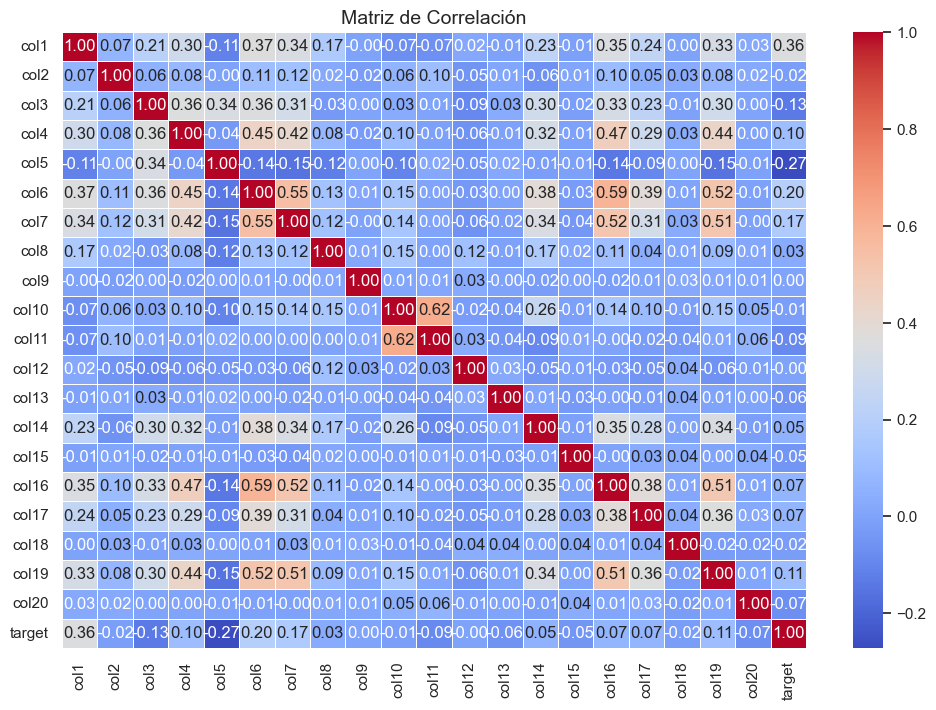

In [25]:
# Calcular la matriz de correlación
corr_matrix = df.drop(columns=['ID'], inplace = True, errors='ignore')  
corr_matrix = df.corr()

# Crear la figura y el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Título
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar gráfico
plt.show()


## 3. Preprocesamiento inicial 

Ya hemos visto que no hay valores faltantes. Buscamos datos duplicados, si existen.

In [59]:
# Contar cuántas filas están duplicadas en todos sus valores
num_duplicados = df.duplicated().sum()

# Mostrar el número total de filas duplicadas
print(f" Número de filas duplicadas: {num_duplicados}")

# Si hay duplicados, mostrar las filas duplicadas
if num_duplicados > 0:
    filas_duplicadas = df[df.duplicated()]
    print("\n Filas duplicadas:")
    print(filas_duplicadas)


 Número de filas duplicadas: 0


Veamos ahora el tema de los ouliers que pudimos ver que existen en las columnas 1 y 3

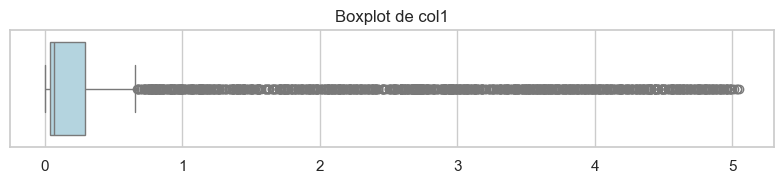

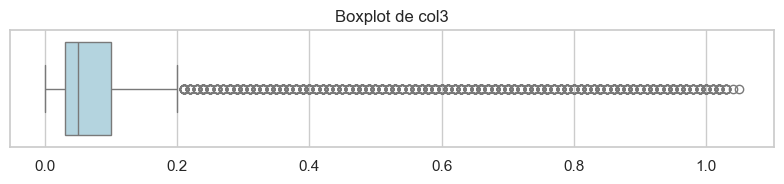

In [77]:
# Lista de columnas con outliers (columnas 1, 3)
columnas = ['col1', 'col3']  

# Crear gráficos para cada columna
for col in columnas:
    fig, ax = plt.subplots(figsize=(8, 2) )

    sns.boxplot(x=df[col], ax=ax, color="lightblue")
    ax.set(title=f"Boxplot de {col}")
    ax.set(xlabel="")  # Ocultar etiqueta del eje X en el boxplot

    plt.tight_layout()
    plt.show()

In [78]:
# Función para detectar outliers usando IQR
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    inferior = Q1 - 1.5 * IQR
    superior = Q3 + 1.5 * IQR
    
    # Detectar outliers
    outliers = df[(df[col] < inferior) | (df[col] > superior)]
    
    # Contar outliers y calcular porcentaje
    num_outliers = len(outliers)
    porcentaje_outliers = (num_outliers / len(df)) * 100
    
    return num_outliers, porcentaje_outliers

# Contar outliers para 'col1' y 'col3'
outliers_col1, porcentaje_col1 = count_outliers(df, 'col1')
outliers_col3, porcentaje_col3 = count_outliers(df, 'col3')

# Mostrar los resultados
print(f"Outliers en 'col1': {outliers_col1} ({porcentaje_col1:.2f}% de los datos)")
print(f"Outliers en 'col3': {outliers_col3} ({porcentaje_col3:.2f}% de los datos)")


Outliers en 'col1': 1220 (21.80% de los datos)
Outliers en 'col3': 1154 (20.62% de los datos)


## 4. Featura engineering

Analizamos la correlación entre las distintas variables.

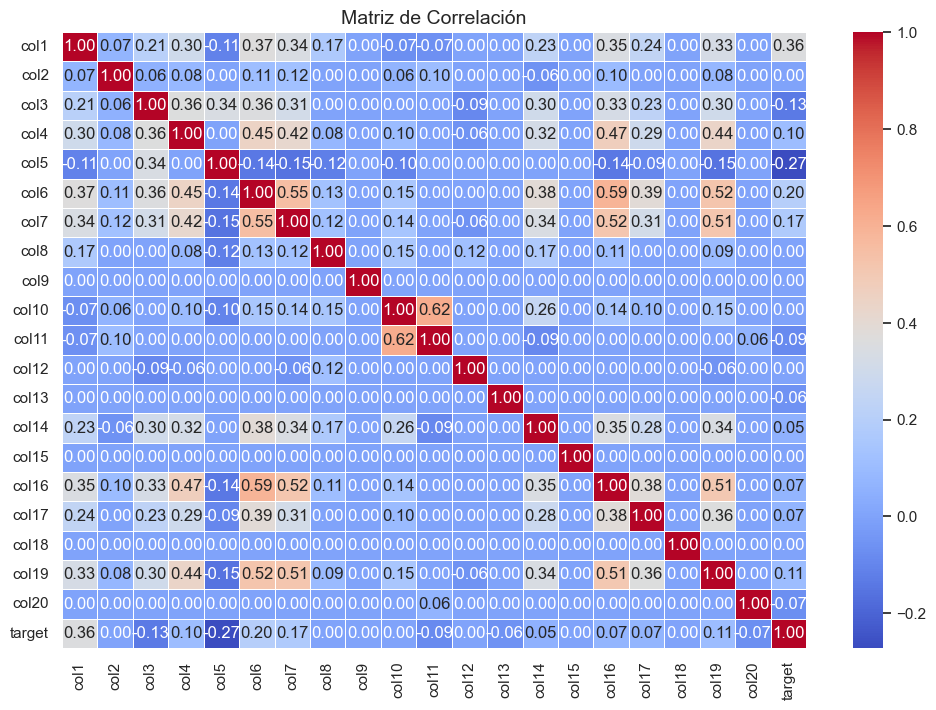

In [33]:
# Eliminar la columna 'ID' y calcular la matriz de correlación
df.drop(columns=['ID'], inplace=True, errors='ignore')
corr_matrix = df.corr()

# Reemplazar valores inferiores a 0.05 por 0
corr_matrix = corr_matrix.where(abs(corr_matrix) >= 0.05, 0)

# Crear la figura y el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Título
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar gráfico
plt.show()

Derivado de lo anterior, voy a eliminar las columnas cuya correlación con la target es menor de 0.05. 

In [35]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['col2', 'col8', 'col9', 'col10', 'col12', 'col14','col15', 'col18']

# Crear el DataFrame limpio eliminando las columnas mencionadas
df_limpio = df.drop(columns=columnas_a_eliminar, errors='ignore')

# Verificar el nuevo DataFrame
df_limpio.head()

,col1,col3,col4,col5,col6,col7,col11,col13,col16,col17,col19,col20,target
ID,,,,,,,,,,,,,
4995,0.02,0.09,1.35,0.060,0.09,0.09,0.009,9.52,1.24,0.96,0.08,0.08,0
1709,1.13,0.32,3.95,0.030,4.66,0.56,0.820,13.83,10.55,3.76,0.45,0.06,0
7825,0.07,0.04,0.14,0.040,0.06,0.06,0.000,2.61,4.13,0.27,0.03,0.01,0
6918,0.09,0.03,0.92,0.090,0.57,0.00,0.004,5.22,11.32,0.25,0.01,0.05,0
5,0.94,0.03,2.88,0.003,0.80,0.43,0.670,9.75,27.17,5.42,0.19,0.02,1


Como confirmación, obtengo la importancia de todas las columnas mediante un metodo más preciso y robusto, lo cual confirma mis conclusiones previas en la matríz de correlación arriba vista. Esto es, que las columnas , 8, 9, 10, 12, 14, 15 y 18 "importan" poco

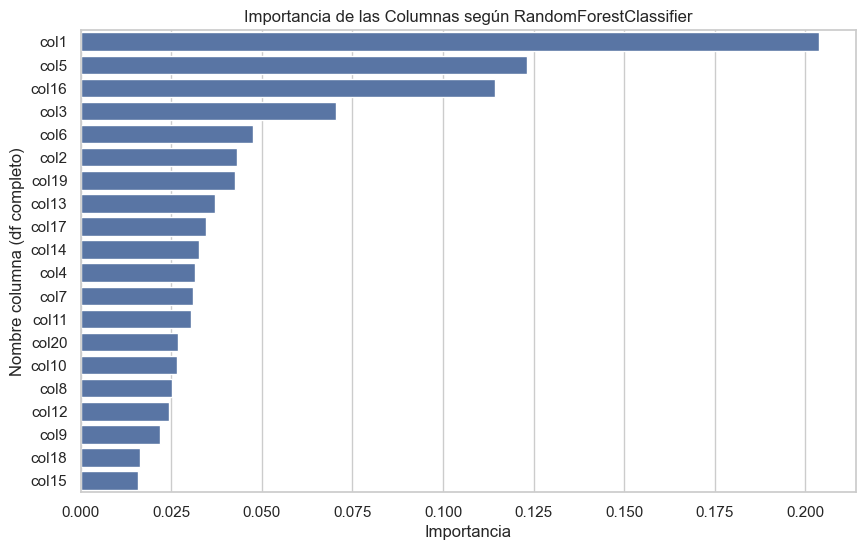

In [56]:
#Comprobación mediante eRandomForest sobre el DF original, de la importancia escasa de las columnas eliminadas
# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['target'])  # En este código, he probado con df o df_limpio, 
            # para reconfirmar que mis eliminaciones de columnas ha sido acertadas
y = df['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = rf_model.feature_importances_

# Crear un DataFrame con la importancia de las características
importancia_df = pd.DataFrame({
    'Nombre columna (df completo)': X.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Nombre columna (df completo)', data=importancia_df)
plt.title('Importancia de las Columnas según RandomForestClassifier')
plt.show()


Voy a realizar un RandomForest, la función de 'importancia de las características/ columnas' para ver si puedo descartar más columnas, y el modelo funciona igual de precisamente. 

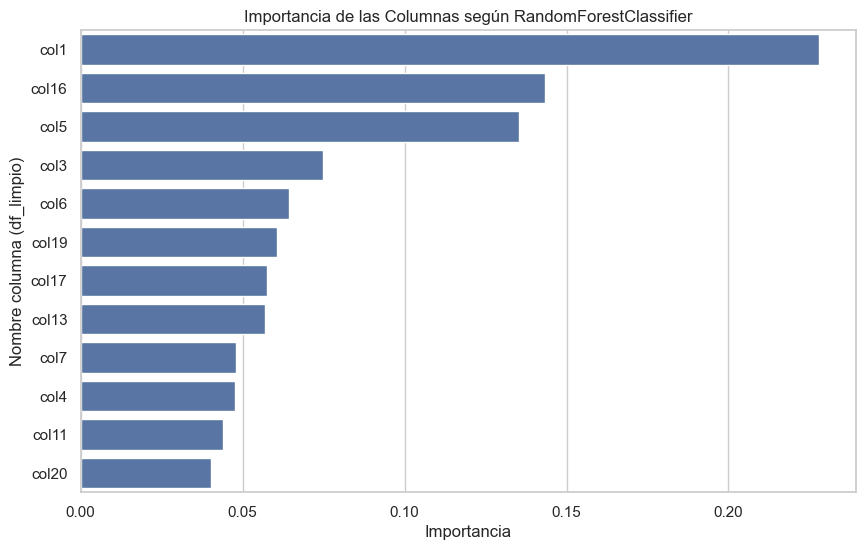

In [96]:
# Separar las características (X) y la variable objetivo (y)
X = df_limpio.drop(columns=['target'])  # En este código, he probado con df o df_limpio, 
            # para reconfirmar que mis eliminaciones de columnas ha sido acertadas
y = df_limpio['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = rf_model.feature_importances_

# Crear un DataFrame con la importancia de las características
importancia_df = pd.DataFrame({
    'Nombre columna (df_limpio)': X.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Nombre columna (df_limpio)', data=importancia_df)
plt.title('Importancia de las Columnas según RandomForestClassifier')
plt.show()


Precisión del modelo: 0.9589


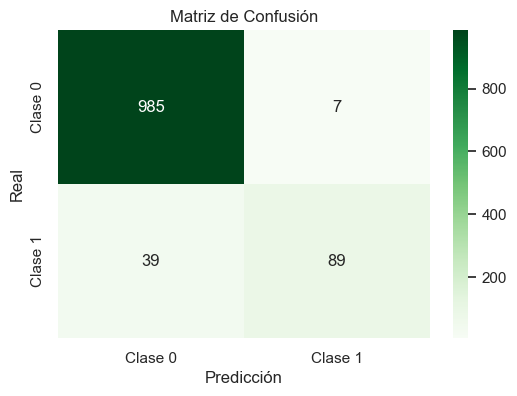


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       992
           1       0.93      0.70      0.79       128

    accuracy                           0.96      1120
   macro avg       0.94      0.84      0.89      1120
weighted avg       0.96      0.96      0.96      1120



In [97]:
# Hacer predicciones
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# 1️.Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# 2️. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 3️. Reporte de Clasificación (Precision, Recall, F1-Score)
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Me resulta útil ver la matriz con porcentajes

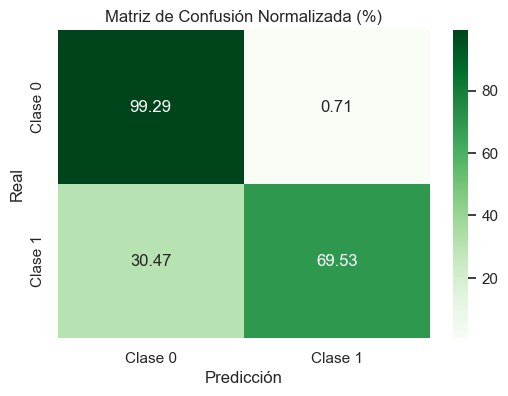

In [98]:
# Normalizar la matriz (convertir en porcentajes por fila)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Crear el heatmap con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])

# Etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Normalizada (%)")
plt.show()

En mi opinión, debo de intentar ajustar los falsos positivos, que deberían ser 1, y sin embargo clasifica como 0.

Voy a realizar lo mismo, con el dataframe original, para ver si mi modelo mejora o empeora.

Precisión del modelo: 0.9580


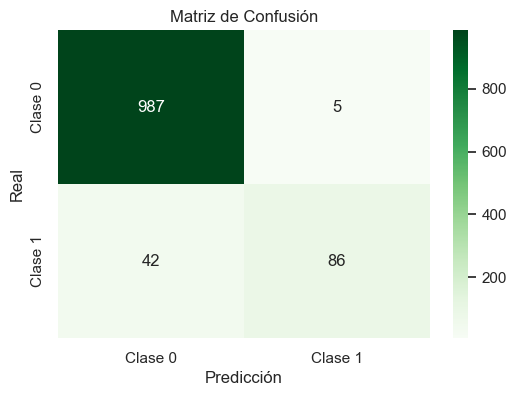


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       992
           1       0.95      0.67      0.79       128

    accuracy                           0.96      1120
   macro avg       0.95      0.83      0.88      1120
weighted avg       0.96      0.96      0.95      1120



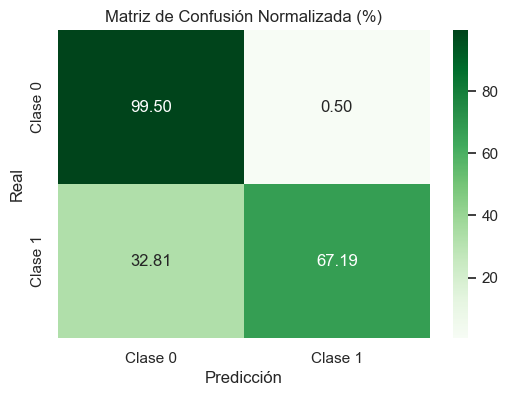

In [53]:
# Este es el codigo completo para darle un DF y obtener la evaluación del modelo entrenado. 

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['target'])  # En este código, he probado con df o df_limpio, 
            # para reconfirmar que mis eliminaciones de columnas ha sido acertadas
y = df['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# 1️.Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# 2️. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 3️. Reporte de Clasificación (Precision, Recall, F1-Score)
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 4. Matriz de Confusión normalizada
# Normalizar la matriz (convertir en porcentajes por fila)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Crear el heatmap con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Normalizada (%)")
plt.show()


Puedo concluir que al eliminar las columnas a raiz de la matriz de correlación, los falsos negativos han aumentado de 5 a 7, bajando un poco la recuperación de valores 0. de 987 a 985 sobre 992. 
A favor, han bajado los falsos positivos, de 42 a 39. 
La exactitud, Accuracy se mantiene igual en ambos casos, 96%. 
El problema en todo caso, parece ser el de los falsos positivos (de 42 a 39), que indica que solo predecimos correctamente 86 (o 89) positivos de los 128 que hay.

Voy a probar si eliminando todas las columnas que me indica 'Feature Importance' de RandomForest, el modelo mejora o empeora

In [100]:
# Lista de columnas a eliminar fruto de FI de RF
columnas_eliminar_RF = ['col15', 'col18', 'col9', 'col12',
                        'col8' , 'col10', 'col20', 'col11',
                        'col7', 'col4', 'col14', 'col17',
                        'col13', 'col19', 'col2', 'col6', 'col3']  #he probado quitando o no la col3, y el resultado no varía

# Crear el DataFrame limpio eliminando las columnas mencionadas
df_limpio2 = df.drop(columns=columnas_eliminar_RF, errors='ignore')

# Verificar el nuevo DataFrame
df_limpio2.head()

,col1,col5,col16,target
ID,,,,
4995,0.02,0.060,1.24,0
1709,1.13,0.030,10.55,0
7825,0.07,0.040,4.13,0
6918,0.09,0.090,11.32,0
5,0.94,0.003,27.17,1


Precisión del modelo: 0.9429


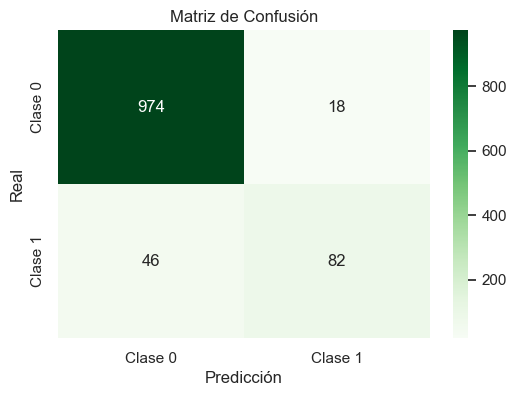


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       992
           1       0.82      0.64      0.72       128

    accuracy                           0.94      1120
   macro avg       0.89      0.81      0.84      1120
weighted avg       0.94      0.94      0.94      1120



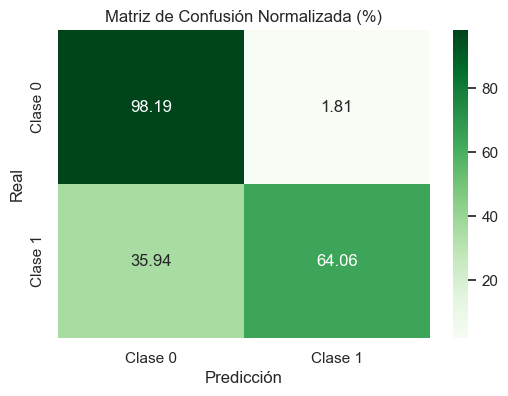

In [101]:
# Este es el codigo completo para darle un DF y obtener la evaluación del modelo entrenado. Caso df_limpio2

# Separar las características (X) y la variable objetivo (y)
X = df_limpio2.drop(columns=['target'])  # En este código, he probado con df o df_limpio, 
            # para reconfirmar que mis eliminaciones de columnas ha sido acertadas
y = df_limpio2['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# 1️.Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# 2️. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 3️. Reporte de Clasificación (Precision, Recall, F1-Score)
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 4. Matriz de Confusión normalizada
# Normalizar la matriz (convertir en porcentajes por fila)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Crear el heatmap con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Normalizada (%)")
plt.show()


Parece que por este camino de eliminar columnas no puedo llegar a mucho más o mejores valores. Me quedo de aquí en adelente con el modelo de df_limpio2, con un valor ligeramente peor, pero menos columnas, más eficiente.

In [102]:
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns[sorted_idx]

pd.DataFrame({'Feature': features, 'Importance': feature_importances[sorted_idx]})


,Feature,Importance
0,col16,0.365254
1,col1,0.363464
2,col5,0.271281


In [105]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [106]:
best_model

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42)

Precisión del modelo: 0.9420


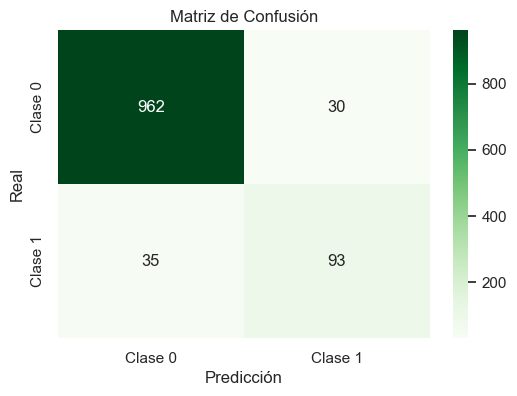


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       992
           1       0.76      0.73      0.74       128

    accuracy                           0.94      1120
   macro avg       0.86      0.85      0.85      1120
weighted avg       0.94      0.94      0.94      1120



In [107]:
# Evaluación del modelo entrenado, con los mejores hiperparamentros de RFC. Caso df_limpio2

# Separar las características (X) y la variable objetivo (y)
X = df_limpio2.drop(columns=['target'])  # En este código, he probado con df o df_limpio, 
            # para reconfirmar que mis eliminaciones de columnas ha sido acertadas
y = df_limpio2['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo con los mejores hiperparámetros
best_rf = RandomForestClassifier(
    class_weight='balanced', 
    max_depth=10,
    min_samples_leaf=2, 
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Entrenar el modelo RandomForestClassifier
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# 1️.Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# 2️. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 3️. Reporte de Clasificación (Precision, Recall, F1-Score)
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))



Observamos que la precisión no mejora, sino empeora. 

In [109]:
feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns[sorted_idx]

pd.DataFrame({'Feature': features, 'Importance': feature_importances[sorted_idx]})


,Feature,Importance
0,col5,0.368999
1,col1,0.367456
2,col16,0.263545


Probaré a ajustar el umbral, por defecto en 0.5, y pasarlo a 0.4


In [110]:
from sklearn.metrics import precision_recall_curve

# Obtener probabilidades de predicción
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Ajustar threshold (ejemplo: 0.4 en vez de 0.5)
y_pred_adjusted = (y_probs >= 0.4).astype(int)

print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       992
           1       0.65      0.73      0.69       128

    accuracy                           0.93      1120
   macro avg       0.81      0.84      0.82      1120
weighted avg       0.93      0.93      0.93      1120



In [118]:
# Definir y entrenar el modelo
adaboost = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Evaluar el modelo
y_pred_ada = adaboost.predict(X_test)
print("AdaBoost Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       992
           1       0.00      0.00      0.00       128

    accuracy                           0.89      1120
   macro avg       0.44      0.50      0.47      1120
weighted avg       0.78      0.89      0.83      1120



/Users/angelg.villanueva/Library/Caches/pypoetry/virtualenvs/bootcamp-ds-XDMmNXh0-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/angelg.villanueva/Library/Caches/pypoetry/virtualenvs/bootcamp-ds-XDMmNXh0-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/angelg.villanueva/Library/Caches/pypoetry/virtualenvs/bootcamp-ds-XDMmNXh0-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined an

In [119]:
# Definir y entrenar el modelo
gboost = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
gboost.fit(X_train, y_train)

# Evaluar el modelo
y_pred_gb = gboost.predict(X_test)
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       992
           1       0.84      0.63      0.72       128

    accuracy                           0.94      1120
   macro avg       0.89      0.81      0.84      1120
weighted avg       0.94      0.94      0.94      1120



________________________
CODIGO A APLICAR A TEST PARA LA EVALUACIÓN DE SUS PREDICCIONES


In [117]:
dataTest = pd.read_csv('data/test.csv')

dfTest = dataTest.copy()
dfTest.set_index('ID', inplace=True)

columnas_a_eliminar = ['col2', 'col8', 'col9', 'col10', 'col12', 'col14','col15', 'col18']
dfTest_limpio = dfTest.drop(columns=columnas_a_eliminar, errors='ignore')

dfTest_limpio


,col1,col3,col4,col5,col6,col7,col11,col13,col16,col17,col19,col20
ID,,,,,,,,,,,,
2816,0.06,0.04,0.04,0.001,5.10,0.86,0.620,12.63,1.19,7.79,0.43,0.01
3641,0.09,0.63,2.05,0.110,6.81,0.83,0.730,4.49,52.30,1.00,0.12,0.01
7191,0.09,0.07,0.73,0.050,0.10,0.01,0.007,1.03,7.04,0.38,0.05,0.06
5199,0.07,0.04,1.22,0.030,0.16,0.03,0.001,4.07,1.28,0.51,0.03,0.07
7994,0.01,0.01,2.00,0.000,2.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7300,0.06,0.02,0.46,0.090,0.20,0.08,0.005,16.31,2.73,3.53,0.07,0.03
1327,2.99,0.64,2.71,0.010,2.36,0.57,0.006,7.72,12.99,6.11,0.24,0.00
4739,0.08,0.09,2.97,0.010,0.65,0.05,0.005,7.43,4.49,0.50,0.05,0.02
